In [1]:
import pandas as pd
from test import convertCatToNum, drop_rows_with_missing, normalize, encode_player_names, split_data

# on import toutes les données

df_atp = pd.read_csv('all_matches_ATP.csv')

In [2]:
df_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58182 entries, 0 to 58181
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Court         58182 non-null  object 
 1   Surface       58182 non-null  object 
 2   Round         58182 non-null  object 
 3   Player1_name  58182 non-null  object 
 4   Player2_name  58182 non-null  object 
 5   Player1_rank  58182 non-null  int64  
 6   Player2_rank  58182 non-null  int64  
 7   Comment       58182 non-null  object 
 8   Series        41811 non-null  float64
 9   y             58182 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 4.4+ MB


In [3]:
cat_cols = ['Court','Surface','Round',]

num_cols = ["Player1_rank","Player2_rank","Series",]


In [4]:
import numpy as np


df_processed = convertCatToNum(df=df_atp,cat_cols=cat_cols)
df = drop_rows_with_missing(df_processed,columns=["y","Series"])
df_atp = normalize(df,num_cols)


 ===     Replace categorial variable     ===
 ===   Convert categorical to numerical  ===
 ===         drop missing values         ===
 ===            Normalize data           ===


In [5]:
df_atp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41811 entries, 155 to 58181
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player1_name         41811 non-null  object 
 1   Player2_name         41811 non-null  object 
 2   Player1_rank         41811 non-null  float64
 3   Player2_rank         41811 non-null  float64
 4   Comment              41811 non-null  object 
 5   Series               41811 non-null  float64
 6   y                    41811 non-null  int64  
 7   Court_Indoor         41811 non-null  uint8  
 8   Court_Outdoor        41811 non-null  uint8  
 9   Surface_Carpet       41811 non-null  uint8  
 10  Surface_Clay         41811 non-null  uint8  
 11  Surface_Grass        41811 non-null  uint8  
 12  Surface_Hard         41811 non-null  uint8  
 13  Round_1st Round      41811 non-null  uint8  
 14  Round_2nd Round      41811 non-null  uint8  
 15  Round_3rd Round      41811 non-nul

In [6]:
df_atp.head()

,Player1_name,Player2_name,Player1_rank,Player2_rank,Comment,Series,y,Court_Indoor,Court_Outdoor,Surface_Carpet,...,Surface_Grass,Surface_Hard,Round_1st Round,Round_2nd Round,Round_3rd Round,Round_4th Round,Round_Quarterfinals,Round_Round Robin,Round_Semifinals,Round_The Final
155,Pioline C.,Dosedel S.,0.003459,0.021239,Completed,1.0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
156,Arthurs W.,Heuberger I.,0.016684,0.069027,Completed,1.0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
157,Squillari F.,Nestor D.,0.002848,0.064307,Completed,1.0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
158,Santoro F.,Norman M.,0.009563,0.001180,Completed,1.0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
159,Mamiit C.,Prinosil D.,0.025432,0.011504,Completed,1.0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [7]:
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [8]:
df_atp['Comment'].value_counts()

Completed       40248
Retired          1315
Walkover          241
Awarded             3
Disqualified        2
Sched               1
Rrtired             1
Name: Comment, dtype: int64

In [9]:
df_final = encode_player_names(df=df_atp)

=== Encoding player names ===
Encoding completed.


In [10]:
# On sépare le jeu de données
x_train, x_test, y_train, y_test = split_data(df_final, test_size=0.2, random_state=42)

=== Splitting data into train and test sets ===
Data split completed.


In [11]:
X_train = x_train.drop(['Comment'],axis=1)
X_test = x_test.drop(['Comment'],axis=1)

# Decision tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Define model
model = DecisionTreeClassifier()


# define search space
param_grid = {
    'max_depth': list(range(25, 100, 10)),
    'max_features': ['auto', 'sqrt', 'log2']
}

search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)

best_params_deci_tree_bin = result.best_params_
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
# {'max_features': 'auto', 'max_depth': 85}

Best Score: 0.5789588116234328
Best Hyperparameters: {'max_features': 'log2', 'max_depth': 25}


In [25]:
model = DecisionTreeClassifier(**best_params_deci_tree_bin)
# execute search
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25, max_features='log2')

In [26]:
# Prediction with best model from random search 
#best_random = result.best_estimator_

y_pred_test = model.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      3999
           1       0.59      0.59      0.59      4364

    accuracy                           0.57      8363
   macro avg       0.57      0.57      0.57      8363
weighted avg       0.57      0.57      0.57      8363



In [27]:
# On va garder le score d'accuracy pour pouvoir le comparer avec d'autres modèle
from sklearn.metrics import accuracy_score

DescisionTree_score_bin = accuracy_score(y_test, y_pred_test)
DescisionTree_score_bin

0.5701303360038263

# xgboost

XGBoost, ou "eXtreme Gradient Boosting", est un algorithme d'apprentissage automatique basé sur l'idée des arbres de décision boostés. C'est une méthode puissante et populaire pour résoudre des problèmes de régression et de classification.

In [15]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the XGBoost model
model = xgb.XGBClassifier()

# Define the search space (parameter grid)
param_grid = {
    'n_estimators': np.arange(100, 1000, 100),  # Number of boosting rounds
    'max_depth': np.arange(3, 10),  # Maximum tree depth
    'learning_rate': [0.001,0.005,0.01, 0.1],  # Step size shrinkage used in update to prevent overfitting
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees
}

# Create a RandomizedSearchCV object
search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=1)

# Execute the search
result = search.fit(X_train, y_train)

best_param_Xgboost_bin=result.best_params_

# Summarize the results
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best Score: 0.6572590744771831
Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.001, 'colsample_bytree': 0.8}


In [16]:
best_param_Xgboost_bin

{'subsample': 0.7,
 'n_estimators': 500,
 'max_depth': 5,
 'learning_rate': 0.001,
 'colsample_bytree': 0.8}

In [28]:
# Define the XGBoost model
model = xgb.XGBClassifier(**best_param_Xgboost_bin)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [29]:
# Prediction with best model from random search 
y_pred_test = model.predict(X_test)


print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63      3999
           1       0.66      0.70      0.68      4364

    accuracy                           0.66      8363
   macro avg       0.66      0.66      0.66      8363
weighted avg       0.66      0.66      0.66      8363



In [30]:
Xgboost_score_bin = accuracy_score(y_test, y_pred_test)
Xgboost_score_bin

0.6577783092191797

# CatBoost

CatBoost est un algorithme de gradient boosting qui a été conçu pour gérer efficacement les données catégorielles sans nécessiter une préparation de données étendue, comme l'encodage des catégories. 

In [33]:

from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the CatBoost model
model = CatBoostClassifier()

# Define the search space (parameter grid)
param_grid = {
    'iterations': [100, 200, 300],  # Number of boosting rounds
    'depth': [8,10,12],  # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Step size shrinkage used in update
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees 
    'colsample_bylevel': [0.7, 0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees at each level
}

# Create a RandomizedSearchCV object
search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=1)

# Execute the search
result = search.fit(X_train, y_train)

best_param_Xgboost_bin = result.best_params_

# Summarize the results
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

0:	learn: 0.6919716	total: 188ms	remaining: 18.6s
1:	learn: 0.6907494	total: 224ms	remaining: 11s
2:	learn: 0.6895505	total: 289ms	remaining: 9.35s
3:	learn: 0.6883350	total: 358ms	remaining: 8.6s
4:	learn: 0.6871349	total: 425ms	remaining: 8.07s
5:	learn: 0.6859656	total: 501ms	remaining: 7.85s
6:	learn: 0.6848614	total: 572ms	remaining: 7.6s
7:	learn: 0.6837513	total: 640ms	remaining: 7.37s
8:	learn: 0.6826256	total: 712ms	remaining: 7.2s
9:	learn: 0.6815147	total: 779ms	remaining: 7.01s
10:	learn: 0.6804031	total: 848ms	remaining: 6.86s
11:	learn: 0.6793729	total: 926ms	remaining: 6.79s
12:	learn: 0.6783765	total: 993ms	remaining: 6.65s
13:	learn: 0.6773415	total: 1.06s	remaining: 6.53s
14:	learn: 0.6763472	total: 1.13s	remaining: 6.43s
15:	learn: 0.6754136	total: 1.2s	remaining: 6.33s
16:	learn: 0.6744274	total: 1.31s	remaining: 6.39s
17:	learn: 0.6734771	total: 1.4s	remaining: 6.39s
18:	learn: 0.6725131	total: 1.48s	remaining: 6.3s
19:	learn: 0.6715431	total: 1.56s	remaining: 6.22

In [34]:
#best_params = {'subsample': 0.8, 'learning_rate': 0.01, 'iterations': 100, 'depth': 12, 'colsample_bylevel': 0.8}
model = CatBoostClassifier(**best_param_Xgboost_bin)
model.fit(X_train, y_train)

0:	learn: 0.6919716	total: 73.2ms	remaining: 7.25s
1:	learn: 0.6907494	total: 111ms	remaining: 5.42s
2:	learn: 0.6895505	total: 179ms	remaining: 5.78s
3:	learn: 0.6883350	total: 243ms	remaining: 5.83s
4:	learn: 0.6871349	total: 309ms	remaining: 5.87s
5:	learn: 0.6859656	total: 373ms	remaining: 5.84s
6:	learn: 0.6848614	total: 473ms	remaining: 6.29s
7:	learn: 0.6837513	total: 547ms	remaining: 6.29s
8:	learn: 0.6826256	total: 610ms	remaining: 6.17s
9:	learn: 0.6815147	total: 670ms	remaining: 6.03s
10:	learn: 0.6804031	total: 731ms	remaining: 5.91s
11:	learn: 0.6793729	total: 800ms	remaining: 5.86s
12:	learn: 0.6783765	total: 863ms	remaining: 5.77s
13:	learn: 0.6773415	total: 922ms	remaining: 5.66s
14:	learn: 0.6763472	total: 982ms	remaining: 5.57s
15:	learn: 0.6754136	total: 1.05s	remaining: 5.5s
16:	learn: 0.6744274	total: 1.11s	remaining: 5.44s
17:	learn: 0.6734771	total: 1.18s	remaining: 5.37s
18:	learn: 0.6725131	total: 1.24s	remaining: 5.28s
19:	learn: 0.6715431	total: 1.3s	remainin

In [35]:
# Prediction with best model from random search 
# best_random = result.best_estimator_

# y_pred_test = best_random.predict(X_test)
y_pred_test = model.predict(X_test)
y_pred_test_prob = model.predict_proba(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.62      0.63      3999
           1       0.66      0.69      0.68      4364

    accuracy                           0.66      8363
   macro avg       0.66      0.65      0.65      8363
weighted avg       0.66      0.66      0.66      8363



In [36]:
catboost_score_bin = accuracy_score(y_test, y_pred_test)
catboost_score_bin

0.6565825660648092

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

# Define model
model = LogisticRegression()

# define evaluation
# gkf = GroupKFold(n_splits=3) if not spec as cv= in the randomized search default is 5 fold cv

# define search space
param_grid = {
    'C' : np.logspace(0, 4, num=10),
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear', 'sag']
}

search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)

best_params_logist_reg_bin = result.best_params_
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, 

Best Score: 0.646525933157394
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}


In [38]:
# # Prediction with best model from random search 
# best_random = result.best_estimator_
# best_random = model.fit(X_train, y_train)


#best_params = {'solver': 'sag', 'penalty': 'l2', 'C': 1.0}
model = LogisticRegression(**best_params_logist_reg_bin)
model.fit(X_train,y_train)
# plot_gain(X_test=X_test,y_pred=y_pred_test,y_test=y_test, limite_cote=2)

LogisticRegression(solver='liblinear')

In [39]:
# y_pred_test = best_random.predict(X_test)
y_pred_test = model.predict(X_test)
y_pred_test_prob = model.predict_proba(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.54      0.59      3999
           1       0.64      0.75      0.69      4364

    accuracy                           0.65      8363
   macro avg       0.65      0.64      0.64      8363
weighted avg       0.65      0.65      0.64      8363



In [40]:
logisti_reg_score_bin = accuracy_score(y_test, y_pred_test)
logisti_reg_score_bin

0.6483319382996532

# RandomForestClassifier

In [41]:
# Define model
model = RandomForestClassifier()

# define evaluation
#gkf = GroupKFold(n_splits=3) if not spec as cv= in the randomized search default is 5 fold cv

# define search space
param_grid = {
    'max_depth': list(range(25, 100, 10)),
    'n_estimators': list(range(80, 200, 10))
}

search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)

best_params_random_bin = result.best_params_
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6429982084236273
Best Hyperparameters: {'n_estimators': 120, 'max_depth': 55}


In [42]:
#best_params = {'n_estimators': 120, 'max_depth': 55}
model = RandomForestClassifier(**best_params_random_bin)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=55, n_estimators=120)

In [43]:
# Prediction with best model from random search 
# best_random = result.best_estimator_
# y_pred_test = best_random.predict(X_test)

y_pred_test = model.predict(X_test)
y_pred_test_prob = model.predict_proba(X_test)
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.62      0.60      0.61      3999
           1       0.65      0.67      0.66      4364

    accuracy                           0.64      8363
   macro avg       0.64      0.63      0.63      8363
weighted avg       0.64      0.64      0.64      8363



In [44]:
random_score_bin = accuracy_score(y_test, y_pred_test)
random_score_bin

0.6358962094942007

# MLPClassifier

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
mlp = MLPClassifier()

# Il s'agit d'une sortie binaire 
# donc la fonction d’activation des neurones de la couche de sortie est 'logistic'
mlp.out_activation_ = 'logistic'
mlp.n_outputs_ = 1

In [47]:
# Grille de recherche d'hyperparamètres
param_grid = {
    'hidden_layer_sizes': [(30, 20, 15, 25),(50, 40, 30,20)],
    'activation':['relu', 'tanh', 'logistic'],#['relu'],
    'solver':  ['adam', 'lbfgs', 'sgd'],# ['adam'],
}

In [48]:
grid_search = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'hidden_layer_sizes': [(30, 20, 15, 25),
                                                (50, 40, 30, 20)],
                         'solver': ['adam', 'lbfgs', 'sgd']})

In [49]:
# best_params = {'activation': 'relu', 'hidden_layer_sizes': (30, 20, 15, 25), 'solver': 'lbfgs'}

# Obtenir la meilleure configuration d'hyperparamètres
best_params_mlp_bin = grid_search.best_params_
# meilleur parametre
print(f'Best parameters found : {best_params_mlp_bin}')

Best parameters found : {'activation': 'logistic', 'hidden_layer_sizes': (30, 20, 15, 25), 'solver': 'adam'}


In [50]:
best_mlp = MLPClassifier(**best_params_mlp_bin)
best_mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(30, 20, 15, 25))

In [51]:
y_pred_test = best_mlp.predict(X_test)
y_pred_test_prob = best_mlp.predict_proba(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3999
           1       0.52      1.00      0.69      4364

    accuracy                           0.52      8363
   macro avg       0.26      0.50      0.34      8363
weighted avg       0.27      0.52      0.36      8363



c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
mlp_bin = accuracy_score(y_test, y_pred_test)
mlp_bin

0.5218223125672605

# Comparaison modèles binaire

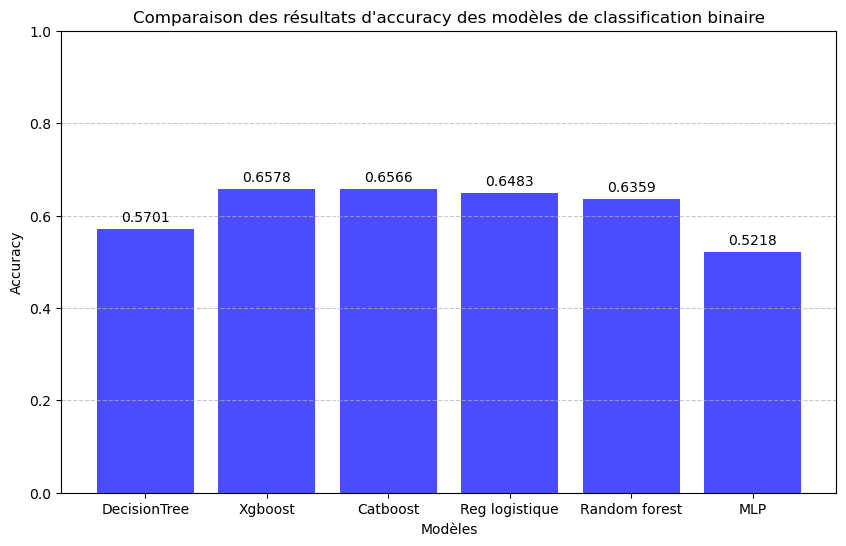

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Scores d'accuracy des différents modèles
accuracy_scores = [DescisionTree_score_bin, Xgboost_score_bin, catboost_score_bin, logisti_reg_score_bin, random_score_bin, mlp_bin] 

# Noms des modèles correspondants
model_names = ['DecisionTree', 'Xgboost', 'Catboost', 'Reg logistique', 'Random forest', 'MLP'] 

# Création de l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='blue', alpha=0.7)
plt.xlabel('Modèles')
plt.ylabel('Accuracy')
plt.title('Comparaison des résultats d\'accuracy des modèles de classification binaire')
plt.ylim(0, 1)  # Assurez-vous que l'axe y va de 0 à 1 pour l'accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage des scores sur chaque barre
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

# Affichage de l'histogramme
plt.show()